In [1]:
from IPython.display import Image

from segar.mdps import MDP
from segar.sim import Simulator
from segar.tasks.classic_control import CartPoleInitialization, CartPoleTask, CartPoleObservation, from_cartpole_basis
from segar.tools.sample_trajectories import rollout, save_gif

/Users/rdevonhjelm/Code/segar/segar/factors/shapes.py:26: DeprecationWarning: Please use `ConvexHull` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import ConvexHull, Delaunay
/Users/rdevonhjelm/Code/segar/segar/factors/shapes.py:26: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import ConvexHull, Delaunay


/Users/rdevonhjelm/miniconda3-x86/envs/segar/lib/python3.9/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


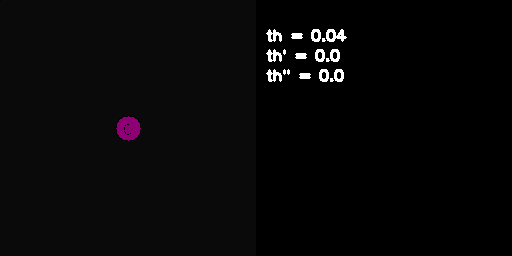

In [2]:
sim = Simulator(friction=0., gravity=9.8, framerate=50)

initialization = CartPoleInitialization()
cartpole_task = CartPoleTask(initialization)
observations = CartPoleObservation()
mdp = MDP(observations, cartpole_task, max_steps_per_episode=200, reset_renderer_every_call=True)
imgs, trajectories = rollout(mdp, show_render=True)

save_gif(imgs, out_path='cartpole.gif')
Image(open('cartpole.gif','rb').read())

In [3]:
from gym.envs.classic_control import CartPoleEnv
import numpy as np

from segar.factors import Position, Velocity
from segar.tasks.classic_control import Angle, AngularVelocity, from_cartpole_basis

sim = Simulator(friction=0., gravity=9.8, framerate=50)

initialization = CartPoleInitialization()
cartpole_task = CartPoleTask(initialization)
observations = CartPoleObservation()
mdp = MDP(observations, cartpole_task, max_steps_per_episode=200, reset_renderer_every_call=True, stop_on_done=False)
cartpole = sim.things['cartpole']

env = CartPoleEnv()
env.kinematics_integrator = None
state = env.reset()
with cartpole.in_place():
    cartpole[Position] = np.array([0., from_cartpole_basis(state[0])])
    cartpole[Velocity] = np.array([0., from_cartpole_basis(state[1], recenter=False)])
    cartpole[Angle] = state[2]
    cartpole[AngularVelocity] = state[3]

assert np.allclose(mdp.observation(mdp.state), state)

for i in range(10):
    print(mdp.step(0)[0] - env.step(0)[0])


[-1.29183215e-08 -7.20421900e-07  2.13078427e-08  1.09519446e-06]
[-6.02517857e-07 -2.94278227e-05  9.05123323e-07  4.41125429e-05]
[-2.38212151e-06 -8.89988093e-05  3.57920926e-06  1.33727842e-04]
[-4.19085278e-06 -9.04570527e-05  6.31870898e-06  1.36936540e-04]
[-1.22290067e-07  2.03407647e-04  2.79692305e-07 -3.01932207e-04]
[ 2.47636269e-05  1.24440015e-03 -3.69370939e-05 -1.86098087e-03]
[ 0.00010026  0.0037749  -0.00014997 -0.0056516 ]
[ 0.00027848  0.00891089 -0.00041651 -0.01332674]
[ 0.0006429   0.01822054 -0.00095977 -0.02716315]
[ 0.00131854  0.03378198 -0.00196115 -0.05006892]


/Users/rdevonhjelm/Code/segar/segar/__init__.py:29: UserWarning: Overwriting sim. This can have unexpected consequences if using old sim objects somewhere.
  warnings.warn(
/Users/rdevonhjelm/miniconda3-x86/envs/segar/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:179: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
